# Customer Segmentation using K-Means Clustering

Here’s the Python code to perform Customer Segmentation using K-Means Clustering, based on behavior, geography, and buying patterns, assuming data extracted from AdventureWorksDW2022.

📂 Expected Input File (customer_features.csv)
Based on your SQL query, this file should contain columns like:

CustomerKey

City, StateProvinceName, CountryRegionName

TotalOrders

TotalSales

AvgOrderValue

DaysSinceLastOrder

   CustomerKey         City StateProvinceName EnglishCountryRegionName  \
0        11000  Rockhampton        Queensland                Australia   
1        11001      Seaford          Victoria                Australia   
2        11002       Hobart          Tasmania                Australia   
3        11003   North Ryde   New South Wales                Australia   
4        11004   Wollongong   New South Wales                Australia   

   TotalOrders  TotalSales  AvgOrderValue  DaysSinceLastOrder  
0            3     8248.99      1031.1237                4420  
1            3     6383.88       580.3527                4199  
2            3     8114.04      2028.5100                4489  
3            3     8139.29       904.3655                4413  
4            3     8196.01      1366.0016                4422  
CustomerKey                 0
City                        0
StateProvinceName           0
EnglishCountryRegionName    0
TotalOrders                 0
TotalSales           

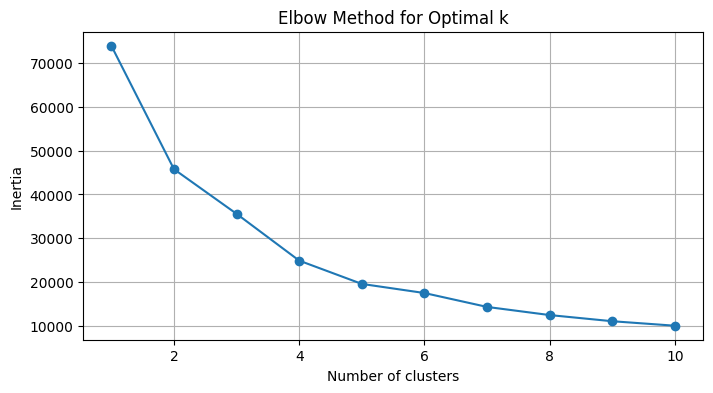

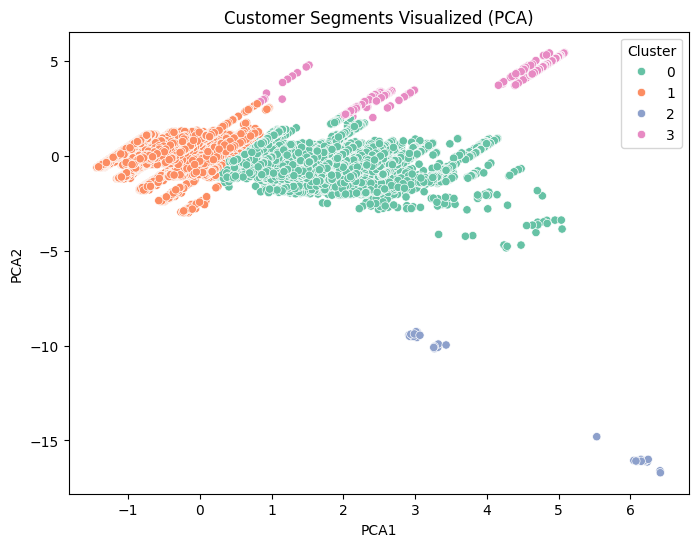

In [8]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Load customer-level data
# Assuming you have a CSV exported from SQL query (like the one shared above)
df = pd.read_csv("customer_features.csv")

# 2. Inspect and clean data
print(df.head())
print(df.isnull().sum())

# Optional: Drop non-numeric columns or encode them if needed
df_model = df.drop(columns=['CustomerKey', 'City', 'StateProvinceName', 'EnglishCountryRegionName'])

# 3. Scale the features
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df_model)

# 4. Use Elbow Method to determine optimal clusters
inertia = []
K = range(1, 11)
for k in K:
    km = KMeans(n_clusters=k, random_state=42)
    km.fit(scaled_data)
    inertia.append(km.inertia_)

plt.figure(figsize=(8, 4))
plt.plot(K, inertia, marker='o')
plt.title("Elbow Method for Optimal k")
plt.xlabel("Number of clusters")
plt.ylabel("Inertia")
plt.grid(True)
plt.show()

# 5. Fit K-Means with chosen number of clusters
optimal_k = 4  # Adjust based on Elbow graph
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
df['Cluster'] = kmeans.fit_predict(scaled_data)

# 6. Visualize clusters using PCA
pca = PCA(n_components=2)
pca_data = pca.fit_transform(scaled_data)
df['PCA1'] = pca_data[:, 0]
df['PCA2'] = pca_data[:, 1]

plt.figure(figsize=(8, 6))
sns.scatterplot(x='PCA1', y='PCA2', hue='Cluster', data=df, palette='Set2')
plt.title("Customer Segments Visualized (PCA)")
plt.show()




In [12]:

# print(pca_data)
print(df.head())

   CustomerKey         City StateProvinceName EnglishCountryRegionName  \
0        11000  Rockhampton        Queensland                Australia   
1        11001      Seaford          Victoria                Australia   
2        11002       Hobart          Tasmania                Australia   
3        11003   North Ryde   New South Wales                Australia   
4        11004   Wollongong   New South Wales                Australia   

   TotalOrders  TotalSales  AvgOrderValue  DaysSinceLastOrder  Cluster  \
0            3     8248.99      1031.1237                4420        0   
1            3     6383.88       580.3527                4199        0   
2            3     8114.04      2028.5100                4489        0   
3            3     8139.29       904.3655                4413        0   
4            3     8196.01      1366.0016                4422        0   

       PCA1      PCA2  
0  3.045289 -0.994769  
1  1.646623 -2.004294  
2  4.056252 -0.370008  
3  2.882262 -1

In [16]:
# 7. Analyze clusters
cluster_summary = df.groupby('Cluster') 
#.mean()
print("Cluster Profile Summary:")
print(cluster_summary.head())

Cluster Profile Summary:
       CustomerKey            City StateProvinceName EnglishCountryRegionName  \
0            11000     Rockhampton        Queensland                Australia   
1            11001         Seaford          Victoria                Australia   
2            11002          Hobart          Tasmania                Australia   
3            11003      North Ryde   New South Wales                Australia   
4            11004      Wollongong   New South Wales                Australia   
12           11012       Bremerton        Washington            United States   
13           11013         Lebanon            Oregon            United States   
14           11014         Redmond        Washington            United States   
15           11015         Burbank        California            United States   
16           11016  Imperial Beach        California            United States   
19           11019         Langley  British Columbia                   Canada   
78 

# Customer Segmentation using Hierarchical Clustering

Here’s the complete Python code to perform Customer Segmentation using Hierarchical Clustering for the AdventureWorksDW2022 customer data.

This code includes preprocessing, clustering, dendrogram visualization, and PCA-based cluster plotting.

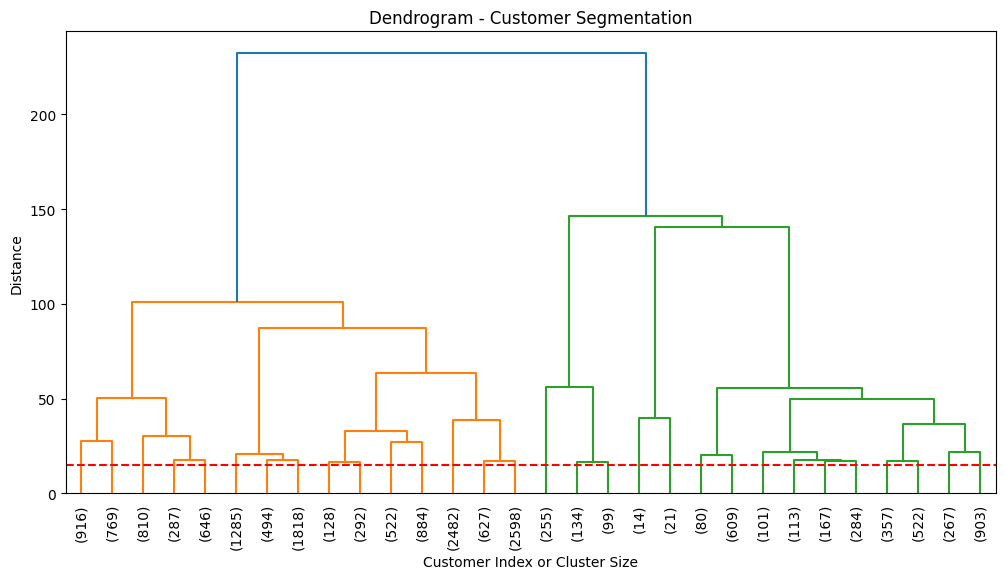

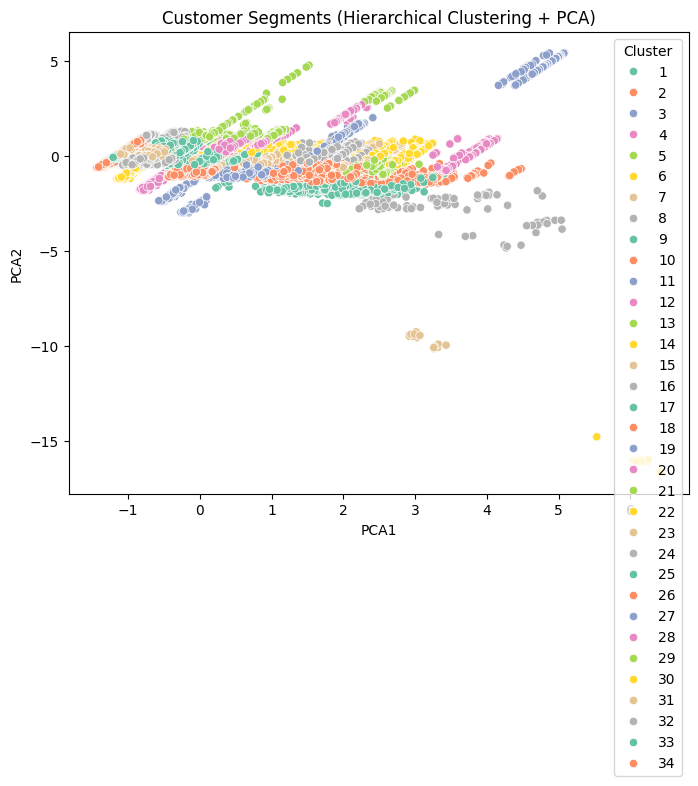

Cluster Summary:
          CustomerKey  TotalOrders   TotalSales  AvgOrderValue  \
Cluster                                                          
1        20501.490175     1.000000  1957.743188     800.062713   
2        21996.093645     2.000000  1629.968470     477.616250   
3        18522.540426     2.000000  2990.128407     827.443891   
4        22222.171084     1.000000  2182.666819     876.030771   
5        22660.020253     1.000000  1735.744184     763.067638   
6        19670.303136     2.000000  2515.927507     673.166530   
7        19469.462848     2.000000  2593.541442     696.554838   
8        21619.647471     1.000000   126.440996      48.727629   
9        22695.848178     1.000000   891.824939     368.009796   
10       21648.253025     1.000000    50.239813      22.786766   
11       12834.765625     4.328125   239.407187      21.838559   
12       14322.883562     3.000000   166.089555      24.346671   
13       15006.839080     2.000000    99.811207      23.789

In [18]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
from sklearn.decomposition import PCA

# 1. Load the data
df = pd.read_csv("customer_features.csv")

# 2. Drop non-numeric or identifier columns
df_model = df.drop(columns=['CustomerKey', 'City', 'StateProvinceName', 'EnglishCountryRegionName'])

# 3. Standardize the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df_model)

# 4. Perform Hierarchical Clustering
linkage_matrix = linkage(scaled_data, method='ward')

# 5. Plot Dendrogram
plt.figure(figsize=(12, 6))
dendrogram(linkage_matrix, truncate_mode='lastp', p=30, leaf_rotation=90., leaf_font_size=10.)
plt.title("Dendrogram - Customer Segmentation")
plt.xlabel("Customer Index or Cluster Size")
plt.ylabel("Distance")
plt.axhline(y=15, color='r', linestyle='--')  # Adjust this threshold for different clusters
plt.show()

# 6. Assign Cluster Labels
# Use the threshold from dendrogram to choose number of clusters
df['Cluster'] = fcluster(linkage_matrix, t=15, criterion='distance')  # Use t as appropriate

# 7. Visualize clusters using PCA
pca = PCA(n_components=2)
pca_data = pca.fit_transform(scaled_data)
df['PCA1'] = pca_data[:, 0]
df['PCA2'] = pca_data[:, 1]

plt.figure(figsize=(8, 6))
sns.scatterplot(x='PCA1', y='PCA2', hue='Cluster', data=df, palette='Set2')
plt.title("Customer Segments (Hierarchical Clustering + PCA)")
plt.legend(title='Cluster')
plt.show()

# 8. Cluster Summary
print("Cluster Summary:")
print(df.groupby('Cluster').mean(numeric_only=True))


## Explanation of the **"Visualize clusters using PCA"**  

Explanation of the **"Visualize clusters using PCA"** step in your clustering pipeline:

---

### 🎯 **Goal**

To **visualize high-dimensional data** (e.g., `TotalSales`, `TotalOrders`, `AvgOrderValue`, etc.) in **2D** space, while preserving as much information (variance) as possible, and **coloring by cluster**.

---

### 🧠 **What is PCA?**

**Principal Component Analysis (PCA)** is a **dimensionality reduction** technique that:

* Transforms your high-dimensional data (like 5–10 features) into a few new axes called **principal components**.
* These new axes are linear combinations of your original features.
* The **first principal component (PCA1)** captures the most variation, the second (PCA2) captures the second most, and so on.

You typically plot:

* **X-axis**: PCA1
* **Y-axis**: PCA2

This lets you **visually separate clusters** even when your original data has many dimensions.

---

### 📊 **What You’re Seeing in the PCA Plot**

```python
sns.scatterplot(x='PCA1', y='PCA2', hue='Cluster', data=df, palette='Set2')
```

* Each **dot** represents a customer.
* Dots are placed in the 2D space based on their **PCA-transformed features**.
* Dots with the same **cluster label** are grouped and colored the same.
* The plot helps you **visually inspect how well the clusters are separated**.

---

### 📌 **Why PCA is Useful in Clustering**

| Benefit                          | Description                                              |
| -------------------------------- | -------------------------------------------------------- |
| Visualization                    | Makes high-dimensional clustering results interpretable. |
| Cluster Validation               | Helps you check if clusters are truly distinct.          |
| Noise Reduction (if used before) | Removes irrelevant variance that can mislead clustering. |

---

### 🧪 Optional Enhancement: Check Variance Explained

```python
print("Explained variance by PCA components:", pca.explained_variance_ratio_)
```

This tells you how much information is retained in PCA1 and PCA2. Ideally, you'd want >70% cumulative variance for a meaningful 2D plot.




## Explaination of Clusters 

In **K-Means clustering**, the algorithm assigns each customer to a **cluster number** (like `0`, `1`, `2`, `3`) based on similarities in their behavior, geography, and buying patterns. These cluster numbers themselves **have no built-in meaning**—they're just labels. But we can **interpret** them by analyzing the **average values** of each feature in each cluster.

---

### ✅ Let’s walk through how to interpret the clusters:

Assume you clustered customers using features like:

* `TotalSales`
* `TotalOrders`
* `AvgOrderValue`
* `DaysSinceLastOrder`
* `Region/Country` (encoded numerically if included)

And after clustering, you run:

```python
df.groupby('Cluster').mean()
```

---

### 🧠 Example Interpretation:

#### 👉 **Cluster 0:**

| Feature            | Avg Value (Cluster 0) |
| ------------------ | --------------------- |
| TotalSales         | ₹2,500                |
| TotalOrders        | 3                     |
| AvgOrderValue      | ₹833                  |
| DaysSinceLastOrder | 250                   |

💡 **Interpretation**:

* Low spenders
* Small number of orders
* Long time since last purchase
  🟡 **Label**: Inactive or low-engagement customers

---

#### 👉 **Cluster 1:**

| Feature            | Avg Value (Cluster 1) |
| ------------------ | --------------------- |
| TotalSales         | ₹12,000               |
| TotalOrders        | 10                    |
| AvgOrderValue      | ₹1,200                |
| DaysSinceLastOrder | 30                    |

💡 **Interpretation**:

* High spenders
* Frequent purchases
* Very recent activity
  🟢 **Label**: Loyal or premium customers

---

#### 👉 **Cluster 2:**

| Feature            | Avg Value (Cluster 2) |
| ------------------ | --------------------- |
| TotalSales         | ₹6,000                |
| TotalOrders        | 8                     |
| AvgOrderValue      | ₹750                  |
| DaysSinceLastOrder | 90                    |

💡 **Interpretation**:

* Medium engagement
* Slightly older recency
  🔵 **Label**: Active but price-sensitive

---

#### 👉 **Cluster 3:**

| Feature            | Avg Value (Cluster 3) |
| ------------------ | --------------------- |
| TotalSales         | ₹3,000                |
| TotalOrders        | 12                    |
| AvgOrderValue      | ₹250                  |
| DaysSinceLastOrder | 10                    |

💡 **Interpretation**:

* Frequent buyers of low-value items
* Recently active
  🟣 **Label**: Bargain hunters or budget customers

---

### 📊 How to Finalize Meaning:

To determine actual cluster meanings:

1. Use `df.groupby('Cluster').agg(...)` to profile each cluster.
2. Create **boxplots** per feature vs. cluster:

   ```python
   sns.boxplot(x='Cluster', y='TotalSales', data=df)
   ```
3. Cross-tab clusters with geography, product category, etc., to uncover patterns.




# Sales Rep Performance Analysis 

Python pipeline for **Sales Rep Performance Analysis** using **ML techniques** and data from the **AdventureWorksDW2022** data warehouse.

We'll approach this as an **unsupervised clustering task** to group **high**, **medium**, and **low** performing sales reps based on key metrics like total sales, orders, regions covered, and customer count.

---

### ✅ Assumptions — Data Extracted from AdventureWorksDW2022:

The following columns are assumed to be in a CSV or DataFrame (`sales_rep_features.csv`), extracted using SQL:

| Column             | Description                       |
| ------------------ | --------------------------------- |
| SalesRepKey        | Unique identifier for Sales Rep   |
| TotalSales         | Total revenue generated           |
| OrderCount         | Number of orders                  |
| AvgOrderValue      | TotalSales / OrderCount           |
| CustomersHandled   | Number of unique customers served |
| TerritoriesCovered | Distinct territories              |
| DaysSinceLastOrder | Days since last order (recency)   |

---

### 🧠 ML Objective:

* Use **K-Means or Hierarchical Clustering** to segment sales reps
* Optionally, use **Classification** (e.g., DecisionTree) to label "Top", "Medium", or "Low" performers if labels exist

 
 

   SalesRepKey    TotalSales  OrderCount  AvgOrderValue  CustomersHandled  \
0          284  3.609447e+06         234   15424.988104                38   
1          295  1.790640e+06         120   14922.001926                32   
2          281  9.293903e+06         450   20653.117790               118   
3          272  1.092124e+06          48   22752.580337                44   
4          292  4.509889e+06         175   25770.793903                34   

   TerritoriesCovered  DaysSinceLastOrder  
0                   1                4211  
1                   1                4211  
2                   4                4211  
3                   6                4211  
4                   1                4211  
SalesRepKey           0
TotalSales            0
OrderCount            0
AvgOrderValue         0
CustomersHandled      0
TerritoriesCovered    0
DaysSinceLastOrder    0
dtype: int64


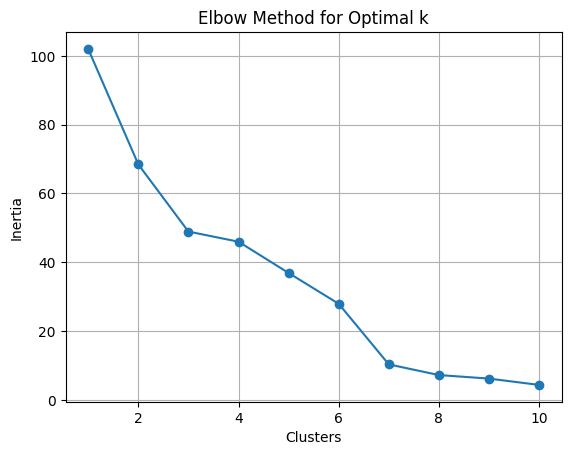

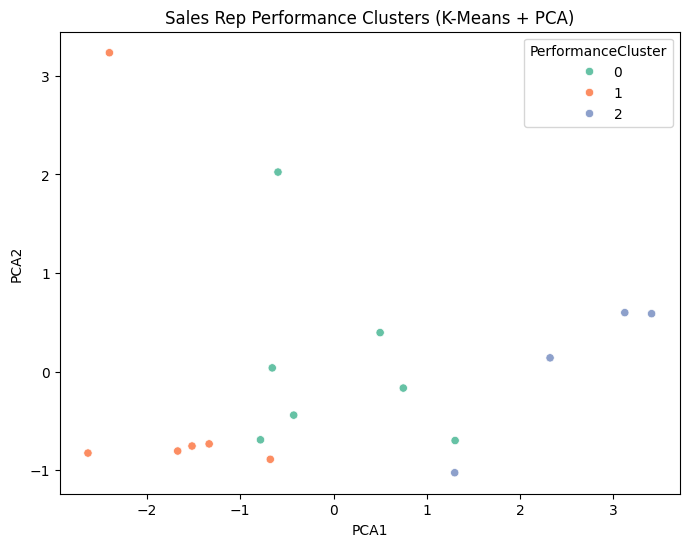

Cluster Summary:
                     SalesRepKey    TotalSales  OrderCount  AvgOrderValue  \
PerformanceCluster                                                         
0                    286.428571  4.787689e+06  195.428571   25160.153224   
1                    292.000000  1.673174e+06  109.666667   14910.555142   
2                    282.750000  9.224432e+06  442.500000   20862.746749   

                    CustomersHandled  TerritoriesCovered  DaysSinceLastOrder  \
PerformanceCluster                                                             
0                          43.142857            2.142857         4211.000000   
1                          29.333333            1.333333         4216.166667   
2                          95.500000            3.000000         4211.000000   

                        PCA1      PCA2  
PerformanceCluster                      
0                   0.012261  0.066408  
1                  -1.705983 -0.128094  
2                   2.537517  0.0759

In [19]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

# 1. Load your data (replace path with your actual file)
df = pd.read_csv("sales_rep_features.csv")

# 2. Preview and clean
print(df.head())
print(df.isnull().sum())

# 3. Prepare features for clustering
df_model = df.drop(columns=['SalesRepKey'])  # Keep only numerical features

# 4. Scale the features
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df_model)

# 5. Elbow method to find optimal clusters
inertia = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_data)
    inertia.append(kmeans.inertia_)

plt.plot(range(1, 11), inertia, marker='o')
plt.title("Elbow Method for Optimal k")
plt.xlabel("Clusters")
plt.ylabel("Inertia")
plt.grid(True)
plt.show()

# 6. Fit KMeans with optimal k (say, 3 clusters)
kmeans = KMeans(n_clusters=3, random_state=42)
df['PerformanceCluster'] = kmeans.fit_predict(scaled_data)

# 7. PCA for visualization
pca = PCA(n_components=2)
pca_data = pca.fit_transform(scaled_data)
df['PCA1'] = pca_data[:, 0]
df['PCA2'] = pca_data[:, 1]

plt.figure(figsize=(8, 6))
sns.scatterplot(x='PCA1', y='PCA2', hue='PerformanceCluster', data=df, palette='Set2')
plt.title("Sales Rep Performance Clusters (K-Means + PCA)")
plt.show()

# 8. Cluster Profiles
cluster_summary = df.groupby('PerformanceCluster').mean(numeric_only=True)
print("Cluster Summary:\n", cluster_summary)


Here's your updated Python code that labels the clusters as "High", "Medium", and "Low" performing sales reps based on their cluster centroids (i.e., average performance metrics in each cluster).

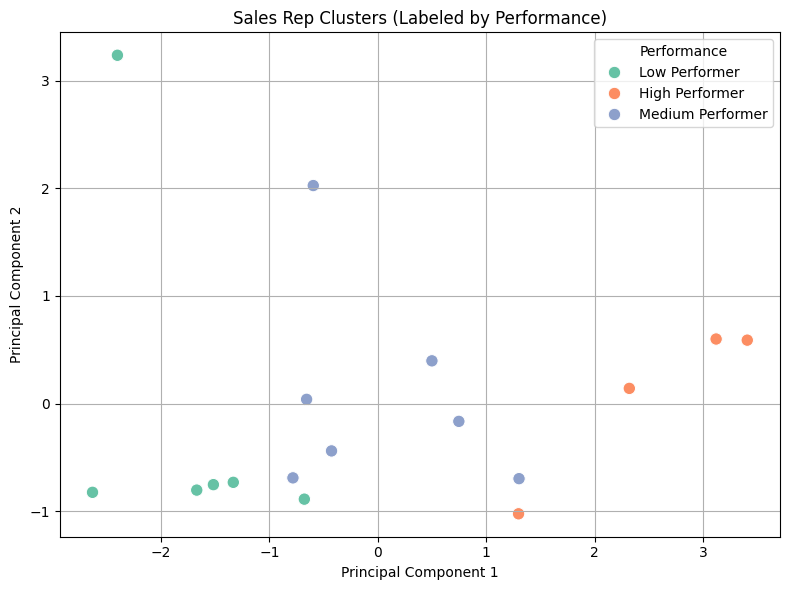

   SalesRepKey    TotalSales  OrderCount  PerformanceLabel
0          284  3.609447e+06         234     Low Performer
1          295  1.790640e+06         120     Low Performer
2          281  9.293903e+06         450    High Performer
3          272  1.092124e+06          48  Medium Performer
4          292  4.509889e+06         175  Medium Performer


In [20]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

# 1. Load your data
df = pd.read_csv("sales_rep_features.csv")  # Contains SalesRepKey, TotalSales, etc.

# 2. Prepare features
df_model = df.drop(columns=['SalesRepKey'])
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df_model)

# 3. Apply K-Means
kmeans = KMeans(n_clusters=3, random_state=42)
df['Cluster'] = kmeans.fit_predict(scaled_data)

# 4. Map clusters to labels based on TotalSales average
cluster_summary = df.groupby('Cluster')['TotalSales'].mean().sort_values(ascending=False)

# Map cluster numbers to labels
cluster_to_label = {
    cluster_summary.index[0]: 'High Performer',
    cluster_summary.index[1]: 'Medium Performer',
    cluster_summary.index[2]: 'Low Performer',
}

df['PerformanceLabel'] = df['Cluster'].map(cluster_to_label)

# 5. PCA for visualization
pca = PCA(n_components=2)
pca_data = pca.fit_transform(scaled_data)
df['PCA1'] = pca_data[:, 0]
df['PCA2'] = pca_data[:, 1]

# 6. Plot with cluster labels
plt.figure(figsize=(8, 6))
sns.scatterplot(x='PCA1', y='PCA2', hue='PerformanceLabel', data=df, palette='Set2', s=80)
plt.title("Sales Rep Clusters (Labeled by Performance)")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.legend(title="Performance")
plt.grid(True)
plt.tight_layout()
plt.show()

# 7. Output labeled data
print(df[['SalesRepKey', 'TotalSales', 'OrderCount', 'PerformanceLabel']].head())

# Optional: Save results
df.to_csv("sales_rep_performance_labeled.csv", index=False)


# Prophet Forecast

Adding **holidays or promotions** helps Prophet adjust for known anomalies in sales, like **spikes during festive months, fiscal starts, or quarterly schemes**. Here's how you can do that.

---

## ✅ Step-by-Step: Add Holidays/Promotions to Prophet Forecast

---

### 🧾 Step 1: Create a Custom Holidays DataFrame

We'll create a custom holiday calendar with **known sales events**.

```python
import pandas as pd

# Example: Promotion or sales boost events
promotion_events = pd.DataFrame({
    'holiday': [
        'Fiscal_Start', 'Diwali_Sale', 'New_Year_Offer',
        'Quarterly_Scheme', 'Monsoon_Push'
    ],
    'ds': pd.to_datetime([
        '2022-04-01', '2022-10-20', '2023-01-01',
        '2023-07-01', '2023-08-15'
    ]),
    'lower_window': 0,
    'upper_window': 2  # Promotion lasts 3 days
})
```

> ✅ `ds` is the date of the event, and Prophet will expand it using `lower_window` and `upper_window`.

---

### 🧠 Step 2: Add Holidays to Prophet Model

```python
from prophet import Prophet

# Include holidays in the model
model = Prophet(
    yearly_seasonality=True,
    weekly_seasonality=False,
    daily_seasonality=False,
    seasonality_mode='multiplicative',
    holidays=promotion_events
)
```
 
---

## 📈 Output Enhancement

Prophet automatically learns **how each holiday affects sales**, and reflects that in:

* `holidays` component in the plot
* Boosts/dips in `yhat` values around those dates

---

## 🛠 Optional Improvements

| Enhancement                    | How to do it                                         |
| ------------------------------ | ---------------------------------------------------- |
| Add **country-level holidays** | `from prophet.make_holidays import make_holidays_df` |
| Different impact per holiday   | Use `prior_scale` per holiday type                   |
| Extend for multiple years      | Repeat holiday dates for multiple years              |
| Region-specific holidays       | Add `country_name='India'` for Prophet built-in      |
 


E:\projects\virtual-envs\llm-jupyter\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
Importing plotly failed. Interactive plots will not work.
10:10:53 - cmdstanpy - INFO - Chain [1] start processing
10:10:54 - cmdstanpy - INFO - Chain [1] done processing


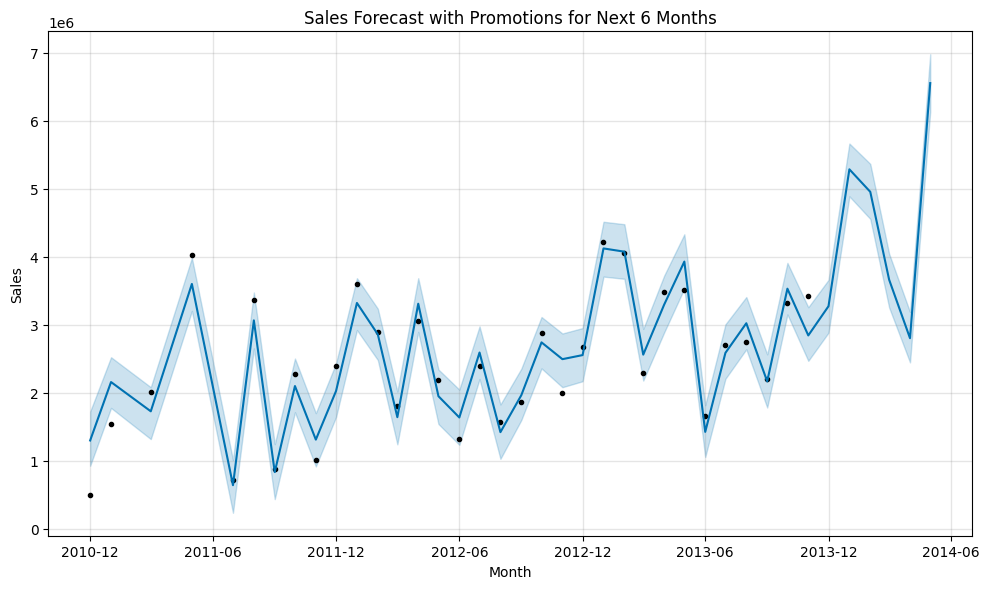

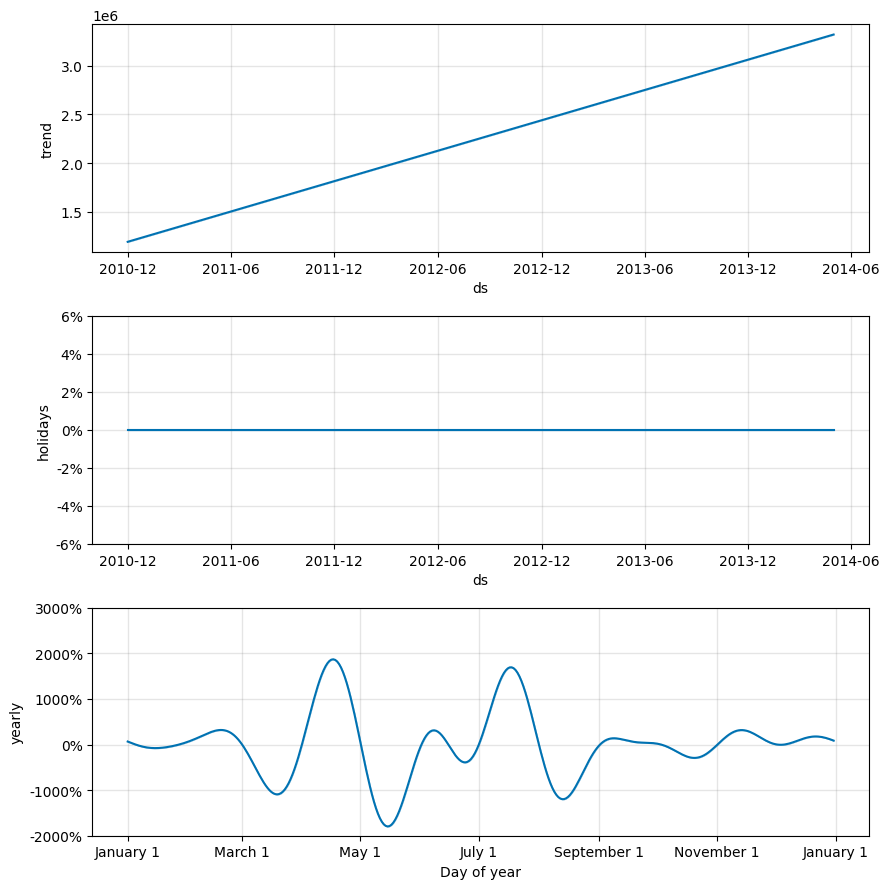

           ds          yhat    yhat_lower    yhat_upper
33 2013-12-01  3.270876e+06  2.881414e+06  3.658695e+06
34 2014-01-01  5.285264e+06  4.887526e+06  5.665004e+06
35 2014-02-01  4.954069e+06  4.555863e+06  5.365222e+06
36 2014-03-01  3.661320e+06  3.252012e+06  4.043402e+06
37 2014-04-01  2.800098e+06  2.444196e+06  3.185995e+06
38 2014-05-01  6.554155e+06  6.132156e+06  6.978416e+06


In [22]:
import pandas as pd
from prophet import Prophet
import matplotlib.pyplot as plt

# 1. Load monthly sales data
df = pd.read_csv('monthly_sales.csv')
df.rename(columns={'MonthStartDate': 'ds', 'MonthlySales': 'y'}, inplace=True)
df['ds'] = pd.to_datetime(df['ds'])

# 2. Define promotions and holiday events
promotion_events = pd.DataFrame({
    'holiday': [
        'Fiscal_Start', 'Diwali_Sale', 'New_Year_Offer',
        'Quarterly_Scheme', 'Monsoon_Push'
    ],
    'ds': pd.to_datetime([
        '2022-04-01', '2022-10-20', '2023-01-01',
        '2023-07-01', '2023-08-15'
    ]),
    'lower_window': 0,
    'upper_window': 2  # Include 3-day effect
})

# 3. Initialize Prophet with promotions
model = Prophet(
    yearly_seasonality=True,
    weekly_seasonality=False,
    daily_seasonality=False,
    seasonality_mode='multiplicative',
    holidays=promotion_events
)

# 4. Fit model
model.fit(df)

# 5. Create future months to predict
N = 6  # Next N months
future = model.make_future_dataframe(periods=N, freq='MS')

# 6. Predict
forecast = model.predict(future)

# 7. Plot forecast
model.plot(forecast)
plt.title(f"Sales Forecast with Promotions for Next {N} Months")
plt.xlabel("Month")
plt.ylabel("Sales")
plt.grid(True)
plt.tight_layout()
plt.show()

# 8. Components with promotion effect
model.plot_components(forecast)
plt.tight_layout()
plt.show()

# 9. Final forecast output
print(forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail(N))
